First, let's import everything we need, and load some MON data:

In [1]:
# Import the Graph Operator - handles data preparation, model creation/recall, hand-off of data to model
from graphchem import GraphOperator

In [2]:
# Other dependencies are for data segmentation, set metric calculations, plotting
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score
from matplotlib import pyplot as plt

In [3]:
# Load some MON data
from graphchem.datasets import load_mon
smiles, mon = load_mon()
print(smiles[:3], '\n', mon[:3])

['CCCCO', 'CCO', 'CO'] 
 [[85.0], [90.0], [89.0]]


In [4]:
# Create training, testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    smiles, mon, test_size=0.20, random_state=42
)
print(len(X_train), len(y_train), len(X_test), len(y_test))

246 246 62 62


We need to set up some variables for our training process (i.e. hyper-parameters). In the future, these will be tunable to reduce model error.

In [5]:
training_config = {
    'task': 'graph',
    'valid_size': 0.2,
    'valid_epoch_iter': 1,
    'valid_patience': 64,
    'batch_size': 32,
    'learning_rate': 0.001,
    'lr_decay': 0.0000001,
    'epochs': 500,
    'verbose': 1
}

We also need to define our model's architecture:

In [6]:
model_config = {
    'n_messages': 2,
    'n_hidden': 3,
    'hidden_msg_dim': 128,
    'hidden_dim': 256,
    'dropout': 0.01
}

Now let's initialize the Graph Operator, and train our model:

In [7]:
go = GraphOperator(config=training_config)
go.train(X_train, y_train, model_config=model_config)

/Users/tjkessler/anaconda3/envs/torch_geometric/lib/python3.8/site-packages/graphchem-1.0.0-py3.8.egg/graphchem/operator.py:43: UserWarning: device config value not found: default value set, cpu
  warnings.warn(


Epoch: 0 | Train Loss: 2712.8634755660078 | Valid Loss: 1719.685302734375
Epoch: 1 | Train Loss: 1044.531773158482 | Valid Loss: 650.1519775390625
Epoch: 2 | Train Loss: 675.7366519850127 | Valid Loss: 521.6205444335938
Epoch: 3 | Train Loss: 480.15634528958066 | Valid Loss: 521.6205444335938
Epoch: 4 | Train Loss: 513.2172178930166 | Valid Loss: 386.8822021484375
Epoch: 5 | Train Loss: 449.6928701595384 | Valid Loss: 386.8822021484375
Epoch: 6 | Train Loss: 460.8499425771285 | Valid Loss: 386.8822021484375
Epoch: 7 | Train Loss: 399.0389155173788 | Valid Loss: 386.8822021484375
Epoch: 8 | Train Loss: 495.8991661850287 | Valid Loss: 379.1761779785156
Epoch: 9 | Train Loss: 395.26361146265145 | Valid Loss: 353.39996337890625
Epoch: 10 | Train Loss: 392.9388228435906 | Valid Loss: 353.39996337890625
Epoch: 11 | Train Loss: 387.6839854960539 | Valid Loss: 350.36004638671875
Epoch: 12 | Train Loss: 393.19954603545517 | Valid Loss: 350.36004638671875
Epoch: 13 | Train Loss: 396.862364009935

Epoch: 112 | Train Loss: 302.56445748465404 | Valid Loss: 225.18399047851562
Epoch: 113 | Train Loss: 247.79267167071907 | Valid Loss: 225.18399047851562
Epoch: 114 | Train Loss: 338.780262538365 | Valid Loss: 225.18399047851562
Epoch: 115 | Train Loss: 246.28164735132333 | Valid Loss: 225.18399047851562
Epoch: 116 | Train Loss: 228.25972202845983 | Valid Loss: 219.59442138671875
Epoch: 117 | Train Loss: 246.83865776840523 | Valid Loss: 219.59442138671875
Epoch: 118 | Train Loss: 263.43966861647004 | Valid Loss: 219.59442138671875
Epoch: 119 | Train Loss: 252.1708423848055 | Valid Loss: 219.59442138671875
Epoch: 120 | Train Loss: 229.46193944191447 | Valid Loss: 219.59442138671875
Epoch: 121 | Train Loss: 248.17331329657108 | Valid Loss: 219.59442138671875
Epoch: 122 | Train Loss: 185.7667918302575 | Valid Loss: 219.59442138671875
Epoch: 123 | Train Loss: 225.8721039441167 | Valid Loss: 219.59442138671875
Epoch: 124 | Train Loss: 243.7763852489238 | Valid Loss: 219.59442138671875
Epoch

Epoch: 220 | Train Loss: 167.36201336919044 | Valid Loss: 172.68075561523438
Epoch: 221 | Train Loss: 171.3050185223015 | Valid Loss: 172.68075561523438
Epoch: 222 | Train Loss: 137.2573024204799 | Valid Loss: 172.68075561523438
Epoch: 223 | Train Loss: 162.60741541336995 | Valid Loss: 172.68075561523438
Epoch: 224 | Train Loss: 143.56324402166874 | Valid Loss: 172.68075561523438
Epoch: 225 | Train Loss: 142.20476874526665 | Valid Loss: 172.68075561523438
Epoch: 226 | Train Loss: 144.14681197185905 | Valid Loss: 172.68075561523438
Epoch: 227 | Train Loss: 158.22171830157845 | Valid Loss: 172.68075561523438
Epoch: 228 | Train Loss: 131.87291608537947 | Valid Loss: 172.68075561523438
Epoch: 229 | Train Loss: 314.16031319754467 | Valid Loss: 172.68075561523438
Epoch: 230 | Train Loss: 280.93201306401465 | Valid Loss: 172.68075561523438
Epoch: 231 | Train Loss: 284.55378326104614 | Valid Loss: 172.68075561523438
Epoch: 232 | Train Loss: 193.269005600287 | Valid Loss: 172.68075561523438
Epo

Let's get predictions, then calculate prediction errors for the training and testing subsets:

In [8]:
y_train_pred = go.use(X_train)
y_test_pred = go.use(X_test)

mae_test = median_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = median_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test Set: R2 = {}, MAE = {}'.format(r2_test, mae_test))
print('Train Set: R2 = {}, MAE = {}'.format(r2_train, mae_train))

Test Set: R2 = 0.18519368963827088, MAE = 9.106616592407228
Train Set: R2 = 0.6523856649656592, MAE = 6.182180023193361


And let's plot our results:

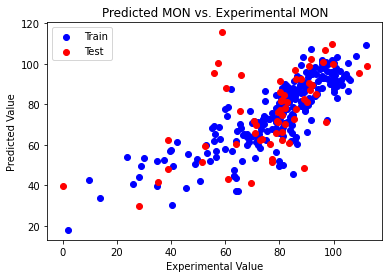

In [9]:
plt.title('Predicted MON vs. Experimental MON')
plt.xlabel('Experimental Value')
plt.ylabel('Predicted Value')
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.legend(loc='upper left')
plt.show()